<a href="https://colab.research.google.com/github/nladocsi/visualization_assignment/blob/main/visualization_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load data:
pt = pd.read_csv('pretrial_data.csv')
x = pt['age']
x = x[ x.isna()==False ].sample(50, random_state=10)
x= x.to_numpy()

#Stats on age:
N = len(x)
sd = np.std(x)
min_x = min(x)
max_x = max(x)

In [ ]:
#Establish Silverman's plug-in Estimate:
#h = 1.06 * sd * N**(-1/5)

In [ ]:
M = 500
grid = np.linspace(min_x-2*sd, max_x+2*sd,M)

In [ ]:
#in the first line I have the default be gaussian
def kernel_density(x, bandwidth=None, kernel='gaussian', M=500):
  #First make the default bandwith
  if bandwidth is None:
    bandwidth = 1.06 * np.std(x) * N**(-1/5)

  #establish grid
  grid = np.linspace(min(x) - 2*sd, max(x) + 2*sd, M)

  #Equation for normal
  def normal_kernel(center,bandwidth, grid):
    return np.exp( -(( (grid-center)/bandwidth)**2)/2 ) / (bandwidth * np.sqrt(2*np.pi))

  #Equation for epanechnikov
  def epanechnikov_kernel(center, bandwidth, grid):
    z = (grid-center)/bandwidth
    k = 0.75 * (1-z**2)
    k[np.abs(z)>1] = 0
    return k / bandwidth

  #Equation for uniform
  def uniform_kernel(center,bandwidth, grid):
    a = (grid-center)/bandwidth
    b = 0.5 * np.ones_like(a)
    b[np.abs(a)>1] = 0
    return b / bandwidth

  #Giving optiond for kernel input
  kernels = {
      "gaussian": normal_kernel,
      "uniform": uniform_kernel,
      "epanechnikov": epanechnikov_kernel
  }

  #only accept these specific values
  if kernel not in kernels:
    raise ValueError(f"Kernel must be one of {list(kernels.keys())}")

  #apply kernel function for each data point
  kde = np.zeros_like(grid, dtype=float)
  for xi in x:
    kde += kernels[kernel](xi, bandwidth, grid)
  kde /= N

  return grid, kde


In [ ]:
#check
#grid, kde = kernel_density(x)
#sns.lineplot(x=grid,y=kde)
#grid, kde = kernel_density(x, kernel='uniform')
#sns.lineplot(x=grid,y=kde)
#grid, kde = kernel_density(x, kernel='epanechnikov')
#sns.lineplot(x=grid,y=kde)

[Text(0.5, 1.0, "Seaborn's Kernel Density Plot"),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, '$\\hat{f}(x)$')]

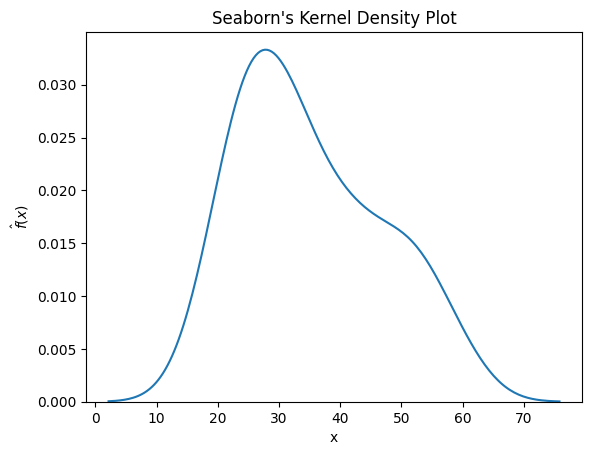

In [ ]:
#Check with seaborn
fig = sns.kdeplot(x)
fig.set(title="Seaborn's Kernel Density Plot", xlabel='x', ylabel='$\\hat{f}(x)$')

For this question I initally did separate def function() statements for each equation then had to re-think and figure out a way to combine them into one.

**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
#2.1
cc = pd.read_csv('college_completion.csv')


In [ ]:
#2.2
print("College completion shape:")
print(cc.shape, '\n')
print('3798 observations', '\n')
print("College Completion variables:")
print(cc.columns, '\n')

print(cc.head())


College completion shape:
(3798, 63) 

3798 observations 

College Completion variables:
Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere

*   There are 3798 observations
*   Dimensions 3798, 63
*   There are a lot of variables included that can be seen above!





In [ ]:
#2.3
#Check variables:
#print(cc['control'].unique(),'\n')
#print(cc['level'].unique(),'\n')
pd.crosstab(cc['control'], cc['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


After cross tabulating:
*   Majority of those at a 4-year level are at a private not-for-private college (most common)
*   Most of the 2-year level students attend a public university
*   The least common woud be a 2-year private not-for-profit college
*   Overall the 4-year level has the most data points and is more common than 2-year college




[Text(0.5, 1.0, 'Histogram of grad_100_value'),
 Text(0.5, 0, 'grad_100_value'),
 Text(0, 0.5, 'Frequency')]

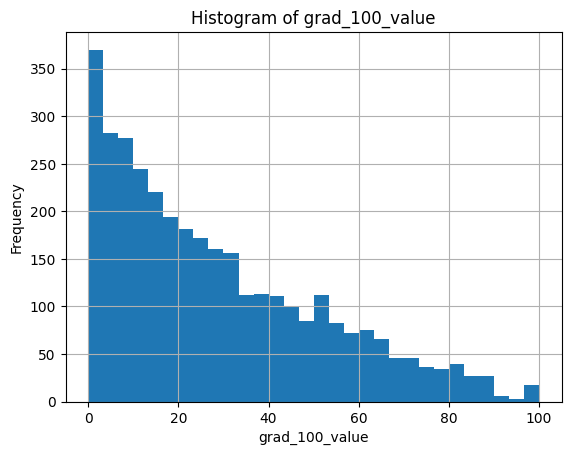

In [ ]:
#2.4.1
#print(cc['grad_100_value'].unique(),'\n')
#print(type(cc['grad_100_value']))
fig = cc['grad_100_value'].hist(bins=30)
fig.set(title="Histogram of grad_100_value", xlabel='grad_100_value', ylabel='Frequency')
#boxplot, and statistical description.

[Text(0.5, 1.0, 'Kernel Density Plot of grad_100_value'),
 Text(0.5, 0, 'grad_100_value'),
 Text(0, 0.5, 'Density')]

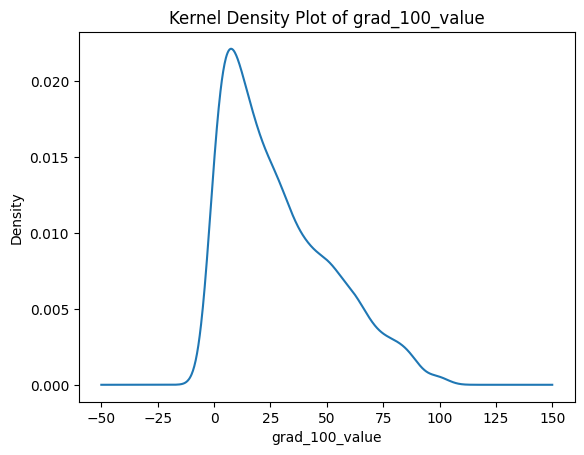

In [ ]:
#2.4.2
fig1 = cc['grad_100_value'].plot.density()
fig1.set(title="Kernel Density Plot of grad_100_value", xlabel='grad_100_value', ylabel='Density')


[Text(0.5, 1.0, 'Boxplot of grad_100_value'),
 Text(0.5, 0, 'grad_100_value'),
 Text(0, 0.5, 'frequency')]

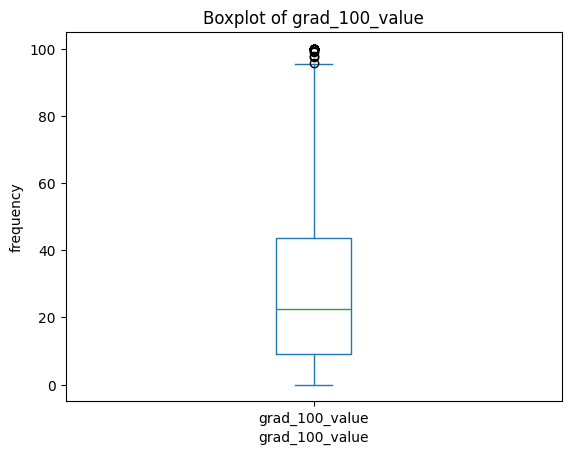

In [ ]:
#2.4.3
fig2 = cc['grad_100_value'].plot.box()
fig2.set(title="Boxplot of grad_100_value", xlabel='grad_100_value', ylabel='frequency')

In [ ]:
#2.4.4
print(cc['grad_100_value'].describe())


count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


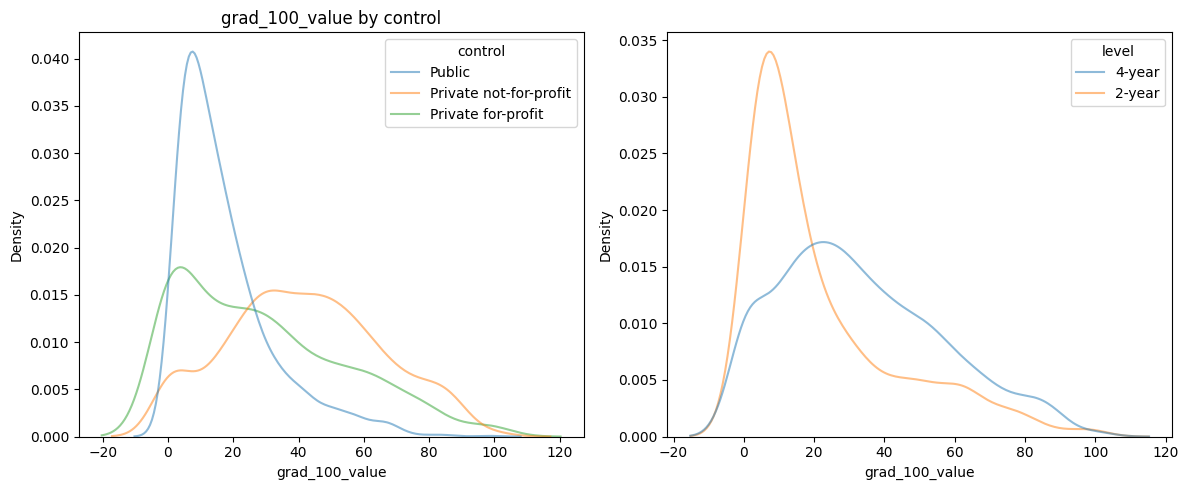

In [ ]:
#2.5.1
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
sns.kdeplot(data=cc, x="grad_100_value", hue="control", fill=False, common_norm=False, alpha=0.5, ax=axes[0])
sns.kdeplot(data=cc, x="grad_100_value", hue="level", fill=False, common_norm=False, alpha=0.5, ax=axes[1])
axes[0].set_title("grad_100_value by control")
plt.tight_layout()
plt.show()

Some observations I have for the graphs is that public grad_100_value has a simiar peak when compared to 2-year grad_100_value. The grad_100_value data point shows the percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time. With this information the observation makes sense.

In [ ]:
#2.5.2
group = cc.groupby(["level", "control"])["grad_100_value"].describe()
print(group)

                                count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public       

The highest count occurs for 4-year private not-for-profit graduates. Second best being 2-year public intitutions. They have a count of 926 but a mean of only 12, the lowest.

<Axes: xlabel='grad_100_value', ylabel='Density'>

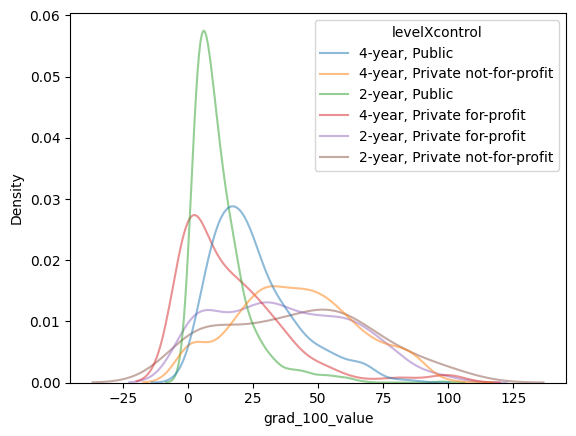

In [ ]:
#2.6
cc['levelXcontrol']=cc['level']+', ' +cc['control']
sns.kdeplot(data=cc, x="grad_100_value", hue="levelXcontrol", fill=False, common_norm=False, alpha=0.5)


The best graduation rates are from 2-year, private not-for-profit intsitutions. The most density occurs for 2-year public universities.

<Axes: xlabel='aid_value', ylabel='Density'>

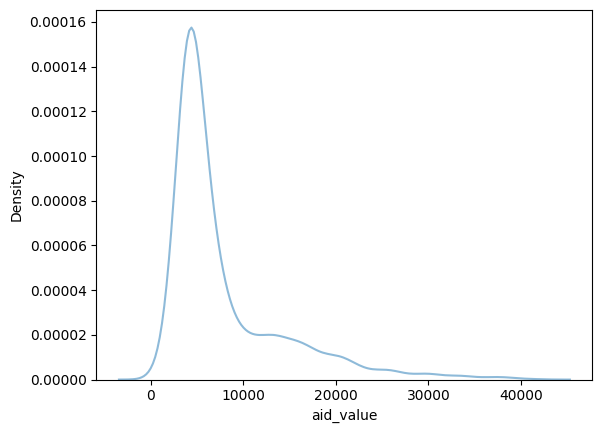

In [ ]:
#2.7.1
sns.kdeplot(data=cc, x="aid_value", fill=False, alpha=0.5)


<Axes: xlabel='aid_value', ylabel='Density'>

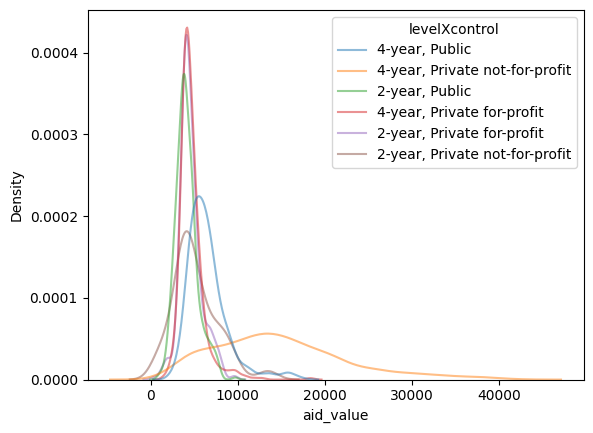

In [ ]:
#2.7.2
sns.kdeplot(data=cc, x="aid_value", hue="levelXcontrol", fill=False, common_norm=False, alpha=0.5)


The shape of this graph can be explained as the aid for public schools are lower and are less common.
The highest aid value occurs for 4-year, private not-for-profit insitutions. It makes sense that a private, more expensive place would require it's students to aquire more aid.

In [ ]:
#2.7.3
cc.loc[:,['aid_value', 'level', 'control'] ].groupby(['level','control']).describe()

aid_value                                     \
                                  count          mean          std     min   
level  control                                                               
2-year Private for-profit         464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit      68.0   5128.058824  2590.449946   934.0   
       Public                     926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit         527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit    1180.0  14702.401695  7649.775203   902.0   
       Public                     632.0   6514.071203  2353.716693  2232.0   

                                                                    
                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

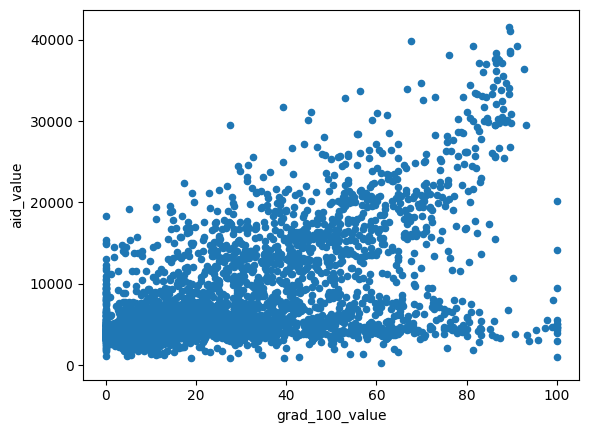

In [22]:
#2.8
cc.plot.scatter(x='grad_100_value', y='aid_value')

Observations
*   I see almost a divergence around 60 where some points go upwards and some remain stagnent and horizontal.
*   A lot of overlapp and hard to read data to the left hand side below 40 grad_100_value.
*   Could consider some points outliers but not drastically

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

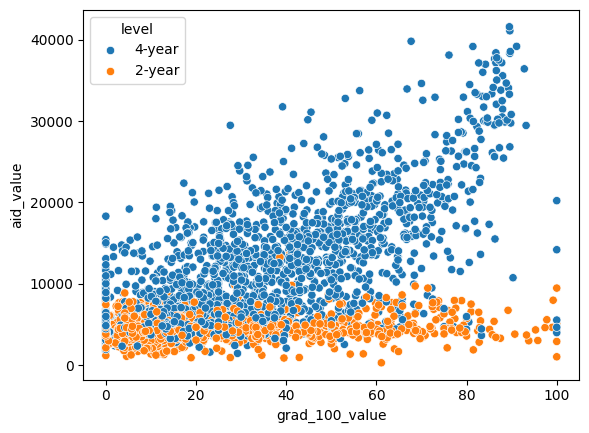

In [25]:
sns.scatterplot(data=cc, x='grad_100_value', y='aid_value', hue='level')

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

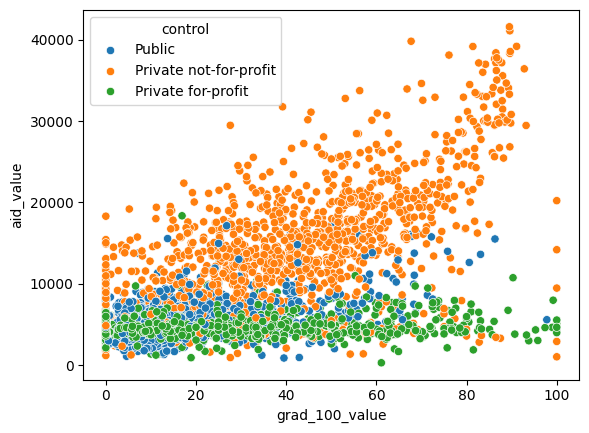

In [26]:
sns.scatterplot(data=cc, x='grad_100_value', y='aid_value', hue='control')

It appears that aid increases graduation rates for a lot of the private not-for-profit institutions. As well as specifically 4-year programs. This was very helpful to group by other factors (hue) because it explained the divergence seen above.